<a href="https://colab.research.google.com/github/vikpy/EconometricsSem3/blob/master/Lec_7_ARCH_AND_GARCH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time series Propertis-Random Walk-White Noise**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
mydataraw = pd.read_csv("oilpriceindex.csv")

In [3]:
mydataraw1 = mydataraw.copy()

In [4]:
mydataraw.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,NaN,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [5]:
mydataraw.describe()

,WTI,BRENT,INR,NIFTY
count,360.000000,359.000000,357.000000,358.000000
mean,47.843528,49.330808,96.766106,0.193324
std,29.194188,32.860975,27.851830,1.890878
min,11.350000,9.820000,35.600000,-6.180000
25%,21.295000,19.755000,76.800000,-0.782500
50%,40.950000,41.580000,95.200000,0.185000
75%,68.397500,70.905000,113.900000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [7]:
mydataraw.isna()

,DATE,WTI,BRENT,INR,NIFTY
0,False,False,False,False,False
1,False,False,False,False,False
2,False,True,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
356,False,False,False,False,False
357,False,False,False,False,False
358,False,False,False,False,False
359,False,False,False,False,False


In [8]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [9]:
mydataraw.NIFTY.isna().sum()

3

In [10]:
mydataraw1.WTI = mydataraw1.WTI.fillna(method='ffill') 

In [16]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      0
NIFTY    3
dtype: int64

In [11]:
mydataraw1.BRENT = mydataraw1.BRENT.fillna(method='bfill') 

In [12]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      4
NIFTY    3
dtype: int64

In [13]:
mydataraw1.INR = mydataraw1.INR.fillna(method = 'ffill')

In [17]:
mydataraw1.isna().sum()

DATE     0
WTI      0
BRENT    0
INR      0
NIFTY    3
dtype: int64

In [18]:
mydataraw1.NIFTY = mydataraw1.NIFTY.fillna(value = mydataraw.NIFTY.mean())

In [19]:
mydataraw.isna().sum()

DATE     0
WTI      1
BRENT    2
INR      4
NIFTY    3
dtype: int64

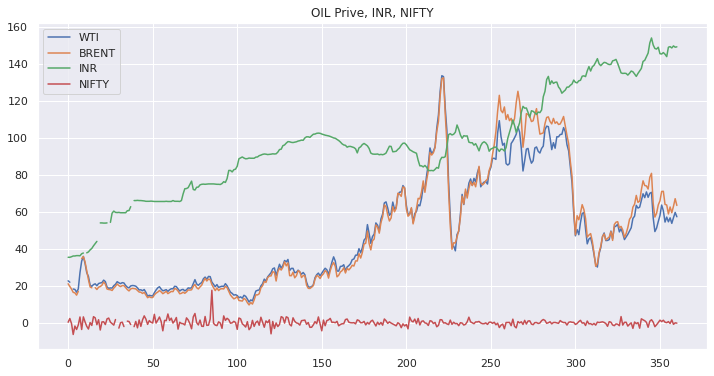

In [20]:
mydataraw.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")
plt.show()

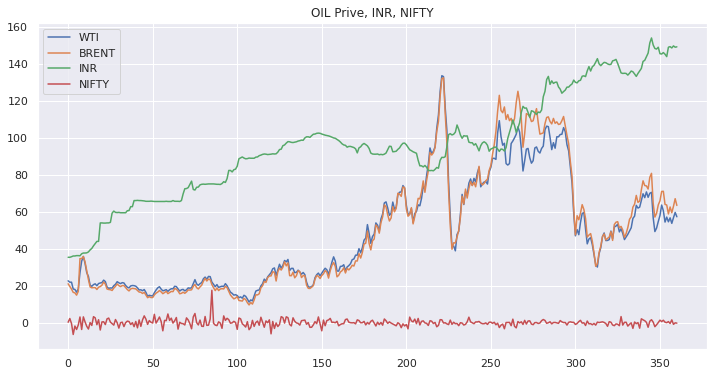

In [21]:
mydataraw1.plot(figsize = (12,6), title = "OIL Prive, INR, NIFTY")

plt.show()

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
mydataraw1.describe()

,WTI,BRENT,INR,NIFTY
count,361.000000,361.000000,361.000000,361.000000
mean,47.772244,49.207341,96.245983,0.193324
std,29.185056,32.816631,28.148450,1.882982
min,11.350000,9.820000,35.600000,-6.180000
25%,21.300000,19.740000,75.500000,-0.760000
50%,40.780000,39.950000,95.100000,0.193324
75%,68.060000,70.760000,113.800000,1.080000
max,133.880000,132.720000,154.300000,17.740000


In [25]:
mydataraw1.head()

,DATE,WTI,BRENT,INR,NIFTY
0,01-01-1990,22.86,21.25,35.6,0.44
1,02-01-1990,22.11,19.81,35.6,2.45
2,03-01-1990,22.11,18.39,35.9,-0.28
3,04-01-1990,18.43,16.61,36.3,-6.18
4,05-01-1990,18.20,16.35,36.3,-1.62


In [ ]:
mydataraw1.DATE.describe()

count            361
unique           361
top       12-01-2014
freq               1
Name: DATE, dtype: object

In [65]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

In [66]:
mydatats.head()

,WTI,BRENT,INR,NIFTY
DATE,,,,
1990-01-01,22.86,21.25,35.6,0.44
1990-02-01,22.11,19.81,35.6,2.45
1990-03-01,NaN,18.39,35.9,-0.28
1990-04-01,18.43,16.61,36.3,-6.18
1990-05-01,18.20,16.35,36.3,-1.62


In [67]:
mydatats.WTI = mydatats.WTI.fillna(method='bfill')

In [68]:
mydatats.isna().sum()

WTI      0
BRENT    2
INR      4
NIFTY    3
dtype: int64

In [69]:
mydatats["WTI_pct"] = mydatats.WTI.pct_change(1)*100
mydatats["WTI_sqr"] = mydatats.WTI_pct.mul(mydatats.WTI_pct)

<function matplotlib.pyplot.tight_layout>

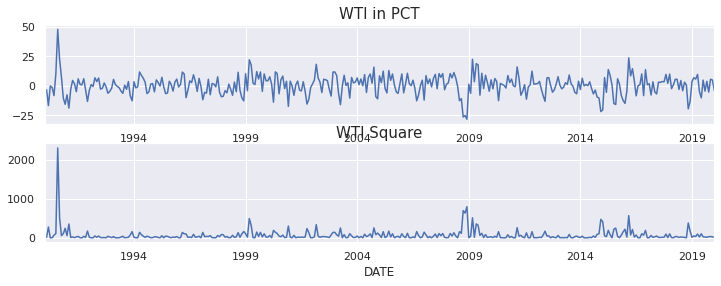

In [70]:
plt.subplot(2, 1, 1)
mydatats.WTI_pct.plot(figsize = (12,4))
plt.title("WTI in PCT", size=15)

plt.subplot(2, 1, 2)
mydatats.WTI_sqr.plot(figsize = (12,4))
plt.title("WTI Square", size=15)
plt.tight_layout

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts 
import statsmodels.api as sm
from statsmodels.tsa.seasonal import  seasonal_decompose
import seaborn as sns

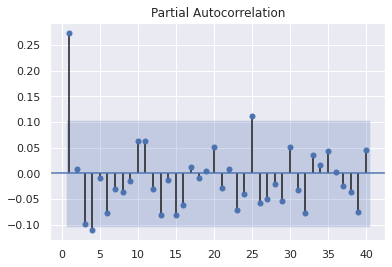

In [35]:
sgt.plot_pacf(mydatats.WTI_pct[1:], lags = 40, alpha=0.05, zero=False, method='ols')
plt.show()

In [ ]:
sgt.plot_pacf(mydatats.WTI_pct[1:], lags = 40,\
              alpha=0.05,\
              zero=False,\
              method='ols')
plt.show()

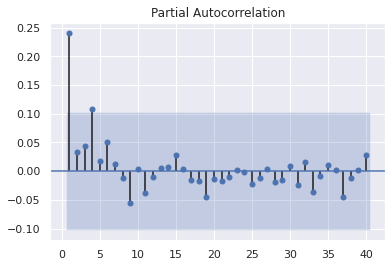

In [36]:
sgt.plot_pacf(mydatats.WTI_sqr[1:], lags = 40,\
              alpha=0.05,\
              zero=False,\
              method='ols')
plt.show()

In [37]:
# ARCH(p)
!pip install arch 

     |████████████████████████████████| 798kB 2.7MB/s 


In [41]:
from arch import arch_model

model_arch = arch_model(mydatats.WTI_pct[1:])
estimates_model_arch = model_arch.fit()
print(estimates_model_arch.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 1258.5517650265342
Iteration:      2,   Func. Count:     13,   Neg. LLF: 1258.1024879333145
Iteration:      3,   Func. Count:     20,   Neg. LLF: 1257.8622593459713
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1257.6671656254728
Iteration:      5,   Func. Count:     34,   Neg. LLF: 1257.65764250495
Iteration:      6,   Func. Count:     41,   Neg. LLF: 1257.632890414631
Iteration:      7,   Func. Count:     47,   Neg. LLF: 1257.6316197574818
Iteration:      8,   Func. Count:     53,   Neg. LLF: 1257.630858842122
Iteration:      9,   Func. Count:     59,   Neg. LLF: 1257.6303702093746
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1257.6303331879035
Iteration:     11,   Func. Count:     71,   Neg. LLF: 1257.6303317719705
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.6303317719155
            Iterations: 11
            Function evaluations: 71
            Gradient evalua

In [43]:
model_arch1 = arch_model(mydatats.WTI_pct[1:], mean="constant", vol = "ARCH", p=1)
estimates_model_arch1 = model_arch1.fit(update_freq = 5)
print(estimates_model_arch1.summary())

Iteration:      5,   Func. Count:     29,   Neg. LLF: 1266.322135996878
Iteration:     10,   Func. Count:     54,   Neg. LLF: 1266.2769270013182
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1266.2769270013418
            Iterations: 10
            Function evaluations: 54
            Gradient evaluations: 10
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -1266.28
Distribution:                  Normal   AIC:                           2538.55
Method:            Maximum Likelihood   BIC:                           2550.21
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      357
Time:       

In [44]:
model_arch2 = arch_model(mydatats.WTI_pct[1:], mean="zero", vol = "ARCH", p=1)
estimates_model_arch2 = model_arch2.fit(update_freq = 5)
print(estimates_model_arch2.summary())

Iteration:      5,   Func. Count:     23,   Neg. LLF: 1268.6375242413455
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1268.6375165773952
            Iterations: 6
            Function evaluations: 27
            Gradient evaluations: 6
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                WTI_pct   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:               -1268.64
Distribution:                  Normal   AIC:                           2541.28
Method:            Maximum Likelihood   BIC:                           2549.05
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      358
Time:                        05:46:20   Df Model:                            2
       

**Higher Order ARCH Model**

In [45]:
model_arch3 = arch_model(mydatats.WTI_pct[1:], mean="constant", vol = "ARCH", p=2)
estimates_model_arch3 = model_arch3.fit(update_freq = 5)
print(estimates_model_arch3.summary())

Iteration:      5,   Func. Count:     35,   Neg. LLF: 1264.492321196396
Iteration:     10,   Func. Count:     66,   Neg. LLF: 1264.4877449950436
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1264.4877433447234
            Iterations: 11
            Function evaluations: 72
            Gradient evaluations: 11
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -1264.49
Distribution:                  Normal   AIC:                           2536.98
Method:            Maximum Likelihood   BIC:                           2552.52
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:       

In [46]:
model_arch4 = arch_model(mydatats.WTI_pct[1:], mean="constant", vol = "ARCH", p=4)
estimates_model_arch4 = model_arch4.fit(update_freq = 5)
print(estimates_model_arch4.summary())

Iteration:      5,   Func. Count:     47,   Neg. LLF: 1258.5591302135804
Iteration:     10,   Func. Count:     90,   Neg. LLF: 1258.1601647233297
Iteration:     15,   Func. Count:    130,   Neg. LLF: 1258.123947550643
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1258.1239475506218
            Iterations: 15
            Function evaluations: 130
            Gradient evaluations: 15
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                       ARCH   Log-Likelihood:               -1258.12
Distribution:                  Normal   AIC:                           2528.25
Method:            Maximum Likelihood   BIC:                           2551.56
                                        No. Observations:                  360
Date:            

**GARCH**

In [47]:
model_garch_1_1 = arch_model(mydatats.WTI_pct[1:], mean="constant", vol = "GARCH", p=1, q=1)
estimates_model_garch_1_1 = model_garch_1_1.fit(update_freq = 5)
print(estimates_model_garch_1_1.summary())

Iteration:      5,   Func. Count:     34,   Neg. LLF: 1257.65764250495
Iteration:     10,   Func. Count:     65,   Neg. LLF: 1257.6303331879035
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.6303317719155
            Iterations: 11
            Function evaluations: 71
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1257.63
Distribution:                  Normal   AIC:                           2523.26
Method:            Maximum Likelihood   BIC:                           2538.81
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:        

alpha[1]: How current market return is sensitive to past realized return volatality 

beta[1]: The part of the return variance (squared return) vol spill over to current period(persistance of the volatility)



In [71]:
model_garch_1_2 = arch_model(mydatats.WTI_pct[1:], \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=2)
estimates_model_garch_1_2 = model_garch_1_2.fit(update_freq = 10)
print(estimates_model_garch_1_2.summary())

Iteration:     10,   Func. Count:     77,   Neg. LLF: 1255.3924149228878
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1255.3905386044817
            Iterations: 13
            Function evaluations: 98
            Gradient evaluations: 13
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -1255.39
Distribution:                  Normal   AIC:                           2520.78
Method:            Maximum Likelihood   BIC:                           2540.21
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      355
Time:                        06:09:34   Df Model:                            5
     

observer beta 1, t=0, p value is 1 

this indicates perfect collinearity 


X1 = Income 
X2 = Wealth

Condn : My main income comes from wealth 

X2 = Z score of X1 

Hence there will be possibility of high multicollinearity 

Most of the cases ARCH 1(this can be bigger) and GARCH 1 1 model seem to be stronger than any other model 




In [72]:
model_garch_1_3 = arch_model(mydatats.WTI_pct[1:], \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=3)
estimates_model_garch_1_3 = model_garch_1_3.fit(update_freq = 10)
print(estimates_model_garch_1_3.summary())

Iteration:     10,   Func. Count:     86,   Neg. LLF: 1256.7749723649983
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1256.765615482614
            Iterations: 15
            Function evaluations: 127
            Gradient evaluations: 15
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1256.77
Distribution:                  Normal   AIC:                           2525.53
Method:            Maximum Likelihood   BIC:                           2548.85
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      354
Time:                        06:20:01   Df Model:                            6
     

In [73]:
model_garch_2_3 = arch_model(mydatats.WTI_pct[1:], \
                             mean="constant",\
                             vol = "GARCH",\
                             p=2, q=3)
estimates_model_garch_2_3 = model_garch_2_3.fit(update_freq = 10)
print(estimates_model_garch_2_3.summary())

Iteration:     10,   Func. Count:     97,   Neg. LLF: 1256.1287486878762
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1256.0566825134958
            Iterations: 18
            Function evaluations: 169
            Gradient evaluations: 18
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1256.06
Distribution:                  Normal   AIC:                           2526.11
Method:            Maximum Likelihood   BIC:                           2553.32
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      353
Time:                        06:20:38   Df Model:                            7
    

There is no justification for moving to higher order models 


In [74]:
# Hence the best model is 1 1 
model_garch_1_1 = arch_model(mydatats.WTI_pct[1:], \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=1)
estimates_model_garch_1_1 = model_garch_1_1.fit(update_freq = 10)
print(estimates_model_garch_1_1.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1257.9977013981754
            Iterations: 8
            Function evaluations: 54
            Gradient evaluations: 8
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                WTI_pct   R-squared:                      -0.000
Mean Model:             Constant Mean   Adj. R-squared:                 -0.000
Vol Model:                      GARCH   Log-Likelihood:               -1258.00
Distribution:                  Normal   AIC:                           2524.00
Method:            Maximum Likelihood   BIC:                           2539.54
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:                        06:22:32   Df Model:                            4
                                 Mean Model                                
    

In [75]:
mydatats.NIFTY = mydatats.NIFTY.fillna(method="bfill")

In [76]:
mydatats.isna().sum()

WTI        0
BRENT      2
INR        4
NIFTY      0
WTI_pct    1
WTI_sqr    1
dtype: int64

In [78]:
# Hence the best model is 1 1 
model_nif_garch_1_1 = arch_model(mydatats.NIFTY, \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=1)
estimates_model_nif_garch_1_1 = model_nif_garch_1_1.fit(update_freq = 10)
print(estimates_model_nif_garch_1_1.summary())

Iteration:     10,   Func. Count:     70,   Neg. LLF: 701.7320881723028
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 701.7317331898603
            Iterations: 12
            Function evaluations: 82
            Gradient evaluations: 12
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  NIFTY   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -701.732
Distribution:                  Normal   AIC:                           1411.46
Method:            Maximum Likelihood   BIC:                           1427.02
                                        No. Observations:                  361
Date:                Sat, Sep 19 2020   Df Residuals:                      357
Time:                        06:26:00   Df Model:                            4
       

Small Alpha indicates that nifty does no react to new stock
if it reacts it will remain relatively strong 

In [79]:
mydatats.BRENT = mydatats.BRENT.fillna(method="bfill")

In [80]:
model_brent_garch_1_1 = arch_model(mydatats.BRENT.diff().dropna(), \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=1)
estimates_model_brent_garch_1_1 = model_brent_garch_1_1.fit(update_freq = 10)
print(estimates_model_brent_garch_1_1.summary())

Iteration:     10,   Func. Count:     67,   Neg. LLF: 962.4714174975118
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 962.4714156581645
            Iterations: 11
            Function evaluations: 73
            Gradient evaluations: 11
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  BRENT   R-squared:                      -0.001
Mean Model:             Constant Mean   Adj. R-squared:                 -0.001
Vol Model:                      GARCH   Log-Likelihood:               -962.471
Distribution:                  Normal   AIC:                           1932.94
Method:            Maximum Likelihood   BIC:                           1948.49
                                        No. Observations:                  360
Date:                Sat, Sep 19 2020   Df Residuals:                      356
Time:                        06:27:56   Df Model:                            4
       

In [81]:
# if we give non stationary series we get absurd outputs
model_brent_garch_1_1 = arch_model(mydatats.BRENT, \
                             mean="constant",\
                             vol = "GARCH",\
                             p=1, q=1)
estimates_model_brent_garch_1_1 = model_brent_garch_1_1.fit(update_freq = 10)
print(estimates_model_brent_garch_1_1.summary())

Iteration:     10,   Func. Count:     67,   Neg. LLF: 1506.6890007687725
Iteration:     20,   Func. Count:    130,   Neg. LLF: 1496.3673955663908
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1496.367394800689
            Iterations: 21
            Function evaluations: 130
            Gradient evaluations: 20
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  BRENT   R-squared:                      -0.818
Mean Model:             Constant Mean   Adj. R-squared:                 -0.818
Vol Model:                      GARCH   Log-Likelihood:               -1496.37
Distribution:                  Normal   AIC:                           3000.73
Method:            Maximum Likelihood   BIC:                           3016.29
                                        No. Observations:                  361
Date:                Sat, Sep 19 2020   Df Residuals:                      357
Time:      

**AUTO ARIMA**

In [1]:
!pip install pmdarima

In [7]:
!pip install pyforest 
from pyforest import *

  Created wheel for pyforest: filename=pyforest-1.0.3-py2.py3-none-any.whl size=13716 sha256=9d982c8a9baae54f0f74ca836b5c58e17ce16ba852f2a5fb60b9fb7b65dd176d
  Stored in directory: /root/.cache/pip/wheels/af/0b/39/340a7f15fc8d4ff5ab50847b28789afea04452a9d51b9721b5
Successfully built pyforest


In [23]:
mydatats = pd.read_csv("oilpriceindex.csv", na_values=["null"], index_col='DATE', parse_dates= True, infer_datetime_format= True)

<IPython.core.display.Javascript object>

In [27]:
mydatats.WTI = mydatats.WTI.fillna(method="bfill")
mydatats.NIFTY = mydatats.NIFTY.fillna(method="bfill")
mydatats.INR = mydatats.INR.fillna(method="bfill")

mydatats["WTI_pct"] = mydatats.WTI.pct_change(1).mul(100)

In [28]:
from pmdarima import auto_arima 
model_auto_wti = auto_arima(mydatats.WTI_pct[1:])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



In [29]:
print(model_auto_wti.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(3, 0, 1)   Log Likelihood               -1260.818
Date:                Sat, 19 Sep 2020   AIC                           2533.637
Time:                        06:56:42   BIC                           2556.953
Sample:                             0   HQIC                          2542.908
                                - 360                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1175      0.088      1.328      0.184      -0.056       0.291
ar.L1          1.0924      0.106     10.287      0.000       0.884       1.301
ar.L2         -0.1989      0.083     -2.384      0.0

In [33]:
model_auto_arimax_wti = auto_arima(mydatats.WTI_pct[1:],\
                                   exogenous=mydatats[["NIFTY","INR"]][1:],\
                                   m=5,
                                   max_order=None,
                                   max_p = 4,
                                   max_q = 2,
                                   max_P = 4,
                                   max_D = 1,
                                   max_Q = 4,
                                  maxitert =20,
                                   alpha = 0.05,
                                   n_jobs =1,
                                   trend = 'ct',
                                   information_criterion = 'aic'
                                   )

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning:

No frequency information was provided, so inferred freque

In [34]:
print(model_auto_arimax_wti.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  360
Model:               SARIMAX(1, 0, 0)   Log Likelihood               -1264.183
Date:                Sat, 19 Sep 2020   AIC                           2540.367
Time:                        07:06:34   BIC                           2563.683
Sample:                    02-01-1990   HQIC                          2549.638
                         - 01-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.4259      2.196      1.105      0.269      -1.878       6.730
drift          0.0089      0.012      0.718      0.473      -0.015       0.033
NIFTY          0.1773      0.190      0.934      0.3